In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.optimize
import sklearn.decomposition
import sklearn.manifold
import sklearn.model_selection

In [3]:
housing = pd.read_csv('data/housing.csv')
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
housing = housing.head(4000)
#housing
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# select the features
X = (housing[features].values)

# Fill in missing values
from sklearn.preprocessing import Imputer 
imputer = Imputer(strategy="median")
imputer.fit(X)

X = imputer.transform(X)

# rescale the features, so they have the same variance
for k in range(len(features)):
    X[:,k] = X[:,k] / np.std(X[:,k])

pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)

# how the results are returned
print("μ:", pca.mean_)
k,i = 0,999
print(f"δ[k={k}]:", pca.components_[0])
print(f"λ[k={k},i={i}]:", pca_result[i,0])

/home/joe/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


μ: [2.26647978 1.30948777 1.35413555 1.35222514 1.34486583 2.0320085
 1.67751641]
δ[k=0]: [-0.21152915  0.48342115  0.47623881  0.46599935  0.48154417  0.14736748
  0.15491497]
λ[k=0,i=999]: -0.26496849492023333


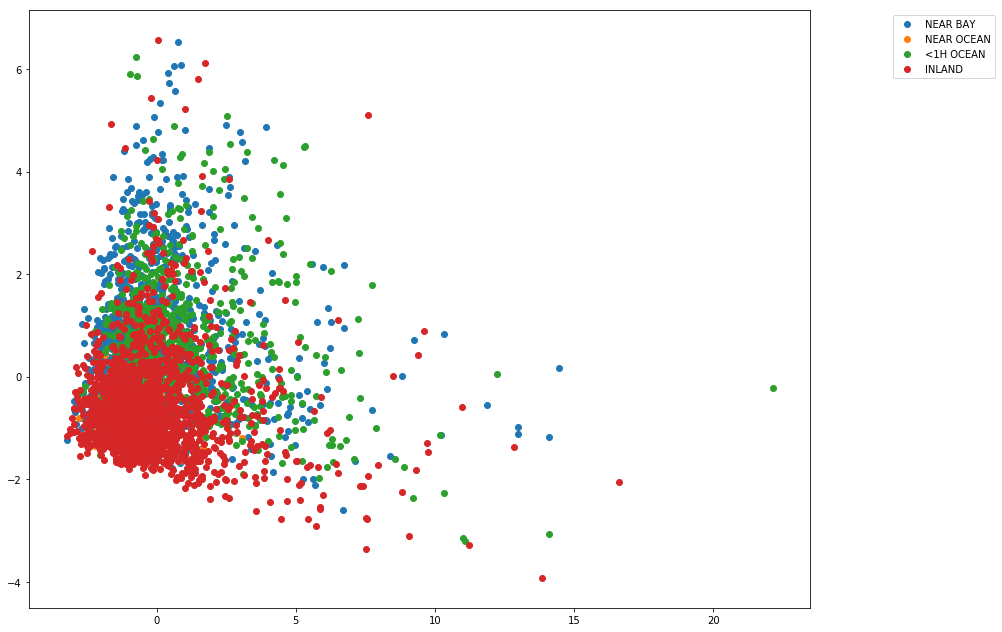

In [5]:
p1,p2 = pca_result[:,0], pca_result[:,1]

ocean_prox_values = housing['ocean_proximity'].tolist()
distinct_levels_for_ocean_proximity = set(ocean_prox_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_ocean_proximity:
        i = [ocean_prox_values[k] == lvl for k in range(len(ocean_prox_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.show()

## Question 2

In [11]:
tsne = sklearn.manifold.TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.028s...
[t-SNE] Computed neighbors for 4000 samples in 0.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.335595
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.898132
[t-SNE] KL divergence after 1000 iterations: 1.262321


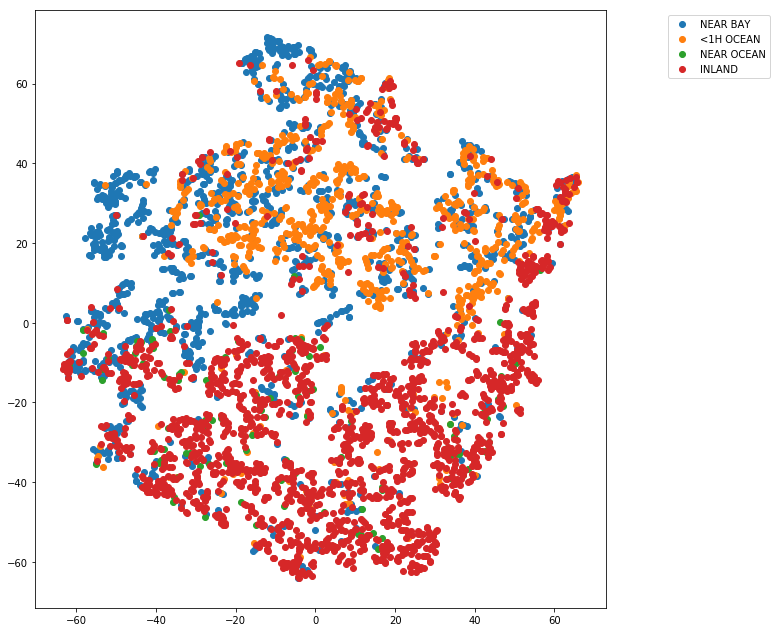

In [12]:
p1,p2 = tsne_results[:,0], tsne_results[:,1]

ocean_prox_values = housing['ocean_proximity'].tolist()
distinct_levels_for_ocean_proximity = set(ocean_prox_values)

with plt.rc_context({'figure.figsize': (14,11)}):
    for lvl in distinct_levels_for_ocean_proximity:
        i = [ocean_prox_values[k] == lvl for k in range(len(ocean_prox_values))]
        plt.scatter(p1[i], p2[i], label=lvl)

plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
plt.gca().set_aspect('equal')
plt.show()

## Question 3:

It attempts to preserve local structure: in other words, points that are close (according to some metric) in high-dimensional space remain close in the new, low-dimensional space. So scaling to equal sizes of axis' allows us to more accurately interpret the "closeness" of points (i.e. not stretched out etc). PCA doesn't do this, and so scale doesn't really matter.

## Question 4:

/home/joe/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


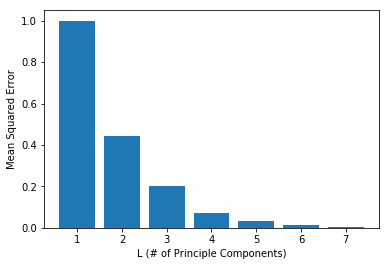

In [7]:
housing = pd.read_csv('data/housing.csv')
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
#housing = housing.head(4000)

# select the features
X = (housing[features].values)

# Fill in missing values
from sklearn.preprocessing import Imputer 
imputer = Imputer(strategy="median")
imputer.fit(X)

X = imputer.transform(X)

# rescale the features, so they have the same variance
for k in range(len(features)):
    X[:,k] = X[:,k] / np.std(X[:,k])


pca = sklearn.decomposition.PCA()
pca_result = pca.fit_transform(X)

from sklearn.metrics import mean_squared_error
x = [i+1 for i in range(len(features))]
MSEs = []
μ = pca.mean_
δ = pca.components_
λ = pca_result

def get_sum_term(i,λ,δ,features_count):
    return sum([λ[i,j]*δ[j] for j in range(features_count)])

for j in range(len(features)):
    preds = [(μ + get_sum_term(i,λ,δ,j)) for i in range(len(X))]
    mse = mean_squared_error(preds,X)
    MSEs.append(mse)
plt.bar(x,MSEs)
plt.xlabel("L (# of Principle Components)")
plt.ylabel("Mean Squared Error")
plt.show()

## Question 5

In [6]:
housing = pd.read_csv('housing.csv')
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
#housing = housing.head(4000)

# select the features
X = (housing[features].values)

# Fill in missing values
from sklearn.preprocessing import Imputer 
imputer = Imputer(strategy="median")
imputer.fit(X)

X = imputer.transform(X)

# first term in cost sum is the solution to new data point = mew + x*components

def train_model(X):
    '''X is an unscaled n*K matrix, n training datapoints each with K features'''
    μ = np.mean(X, axis=0)
    σ = np.std(X, axis=0)
    X2 = (X - μ) / σ
    pca = sklearn.decomposition.PCA()
    pca.fit(X2)
    return (μ, σ, pca.components_)

def meancost(Xnew, model, L):
    '''Xnew is an unscaled m*K matrix, m test datapoints each with K features'''
    μ,σ,comp = model
    Xnew2 = (Xnew - μ) / σ
    # return the average cost of the test datapoints, using np.linalg.lstsq
    
    pca = sklearn.decomposition.PCA()
    pca_result = pca.fit_transform(Xnew2)
    
    μ = pca.mean_
    δ = pca.components_
    λ = pca_result
    preds = [(μ + λ[i,L-1]*δ[L-1]) for i in range(len(Xnew2))]
    #print(preds[0])
    
    all_costs = [sum(abs(λ[i,:L-1]))**2 + 5*((np.linalg.norm(preds[i]-Xnew2[i]))**2) for i in range(len(preds))]
    
    av_cost = np.mean(all_costs)
    
    return av_cost

from sklearn.model_selection import KFold

#print(X[0:5])

kf = KFold(n_splits=10)
for i in range(1,len(features)+1):
    split_count = 0
    costs_for_L = []
    for train, test in kf.split(X):
        X_train = X[train]
        X_test = X[test]
        split_count += 1
        model = train_model(X_train)
        cost = meancost(X_test,model,i)
        #print(cost)
        costs_for_L.append(cost)
    print("L = {}, average cost across 10 splits: {}".format(i,np.mean(costs_for_L)))
    



/home/joe/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


L = 1, average cost across 10 splits: 13.797519028555808
L = 2, average cost across 10 splits: 29.456647260272867
L = 3, average cost across 10 splits: 37.87599629359579
L = 4, average cost across 10 splits: 43.92276476363479
L = 5, average cost across 10 splits: 47.367756676036315
L = 6, average cost across 10 splits: 49.713721750504064
L = 7, average cost across 10 splits: 51.40870865982261
